In [1]:
%matplotlib inline
import sys, os
sys.path.append('../../')
import h5py
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from decimal import Decimal
#from tools import OHLC, Density
#from tools import open_file, products
from tools.instruments import instruments
from IPython.display import clear_output
import time

In [5]:
%load_ext autoreload
%aimport tools.instruments
%aimport tools.quotes
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
quote = instruments['AD'].quotes()

In [62]:
quote.PD(percentile=50, inplace=True)

<AxesSubplot:xlabel='date'>

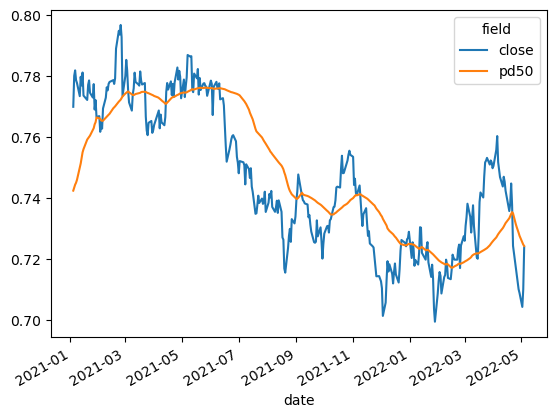

In [65]:
quote[['close','pd50']].loc['2021-01-01':].plot()

In [66]:
q = instruments.quotes()

In [67]:
q.PD(percentile=99)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\python\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\yosep\AppData\Local\Temp\ipykernel_4280\2365103271.py", line 1, in <module>
    q.PD(percentile=99)
  File "C:\Users\yosep\Documents\projects\Trading\02.기초연구\price density\../..\tools\quotes.py", line 255, in PD
    data = file[symbol]['percentiles'][:,percentile]
  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "c:\python\miniconda3\lib\site-packages\h5py\_hl\group.py", line 264, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  File "h5py\_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py\_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py\h5o.pyx", line 190, in h5py.h5o.open
KeyError: "Unable to open object (

In [24]:
savepath = os.path.join(os.getcwd(), '..','..','data','price density',f'percentiles_Tau_50.hdf')
savefile = h5py.File(savepath, 'r')

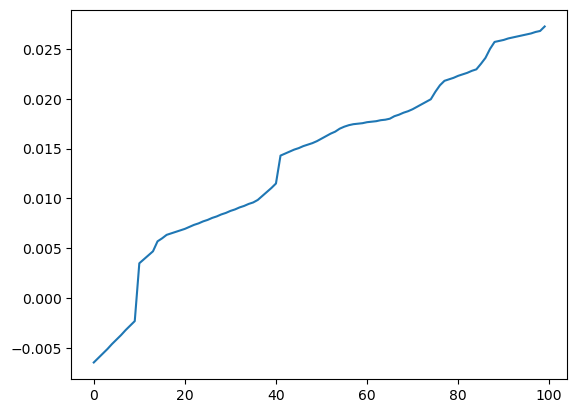

In [27]:
plt.plot(savefile['AD']['percentiles'][20,:])

In [43]:
p = savefile['AD']['percentiles'][:,20]
d = savefile['AD']['dates'][:].astype('M8[ns]')

In [44]:
df = pd.Series(data=p, index=d)

In [90]:
q = instruments['W'].quotes()

In [92]:
q.PD(percentile=10, inplace=True)
q.PD(percentile=90, inplace=True)

<AxesSubplot:xlabel='date'>

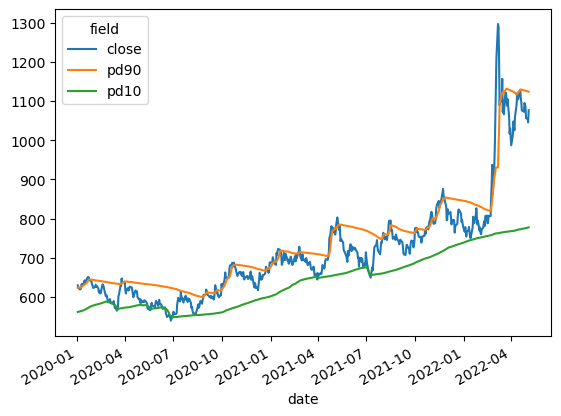

In [94]:
q[['close','pd90','pd10']].loc['2020-01-01':].plot()

In [53]:
df2 = instruments['C'].quotes()

In [56]:
df2['dsf'] = df

In [57]:
df2

field,open,high,low,close,volume,oi,dsf
date,,,,,,,
1960-01-04,778.414978,778.614990,778.114990,778.414978,1794,35081,NaN
1960-01-05,778.515015,778.515015,778.015015,778.414978,3825,34333,NaN
1960-01-06,778.114990,779.114990,778.114990,778.814941,1754,34294,NaN
1960-01-07,778.814941,779.114990,778.814941,779.114990,2852,34224,NaN
1960-01-08,779.015015,779.015015,778.714966,778.714966,3173,33632,NaN
...,...,...,...,...,...,...,...
2022-04-28,812.500000,819.750000,808.500000,813.500000,117244,679979,0.71665
2022-04-29,813.000000,824.500000,809.500000,813.500000,96901,675509,0.71605
2022-05-02,805.000000,808.500000,790.500000,803.500000,109105,678061,0.71435


In [55]:
df

1987-01-13    0.00775
1987-01-14   -0.00440
1987-01-15   -0.00410
1987-01-16   -0.00370
1987-01-19   -0.00270
               ...   
2022-04-28    0.71665
2022-04-29    0.71605
2022-05-02    0.71435
2022-05-03    0.71370
2022-05-04    0.71365
Length: 8916, dtype: float64

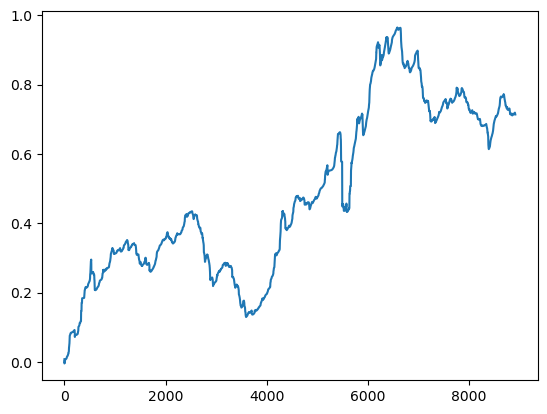

In [34]:
plt.plot(p[:, 20])